# CNN based Image Classification of Hindi characters

---
<a href="https://githubtocolab.com/Hello-Peter-GPU-Hackathon/CNN-Image-Classification/blob/main/GPU_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

###Importing the necessary packages and libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

### Unzip the training data and load it.

In [ ]:
!unzip training.zip
img = image.load_img("training/background/displayPanel_0_flip_sharpen_d3.jpg")

###Display an image from the training dataset to perceive that the dataset is successfully loaded.

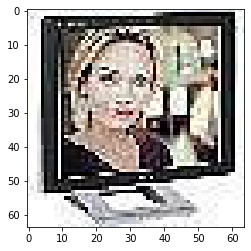

In [3]:
plt.imshow(img)

### Finding the general shape of the images in the dataset.

In [4]:
cv2.imread("training/background/displayPanel_0_flip_sharpen_d3.jpg").shape

(64, 64, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255, shear_range=0.25, zoom_range=0.25, horizontal_flip=True)
validation = ImageDataGenerator(rescale=1/255)

### Load the training data on train_data.

In [6]:
train_data = train.flow_from_directory("training/",target_size=(64, 64), batch_size=32, class_mode='binary')

Found 5875 images belonging to 2 classes.


### Load the validation data on validation_data. Here train_data is same as validation_data.

In [7]:
validation_data = train.flow_from_directory("training/",target_size=(64, 64), batch_size=32, class_mode='binary')

Found 5875 images belonging to 2 classes.


### Find the shape of an image of validation_data.

In [8]:
validation_data.image_shape

(64, 64, 3)

### Get the classes of the images. Here there are two classes - 0 and 1.

In [9]:
train_data.class_indices

{'background': 0, 'hi': 1}

In [10]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

### Make the model as well as compile and fit it.

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (64, 64, 3)), 
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [13]:
model.compile(loss = 'binary_crossentropy',
optimizer='rmsprop', metrics=['accuracy'])

In [14]:
history = model.fit(train_data, epochs=15, steps_per_epoch=100, validation_data=validation_data)

Epoch 1/15
100/100 [==============================] - 44s 161ms/step - loss: 0.5462 - accuracy: 0.7563 - val_loss: 0.4749 - val_accuracy: 0.8071
Epoch 2/15
100/100 [==============================] - 16s 158ms/step - loss: 0.3651 - accuracy: 0.8516 - val_loss: 0.3942 - val_accuracy: 0.8143
Epoch 3/15
100/100 [==============================] - 16s 158ms/step - loss: 0.2687 - accuracy: 0.8974 - val_loss: 0.2655 - val_accuracy: 0.9030
Epoch 4/15
100/100 [==============================] - 16s 158ms/step - loss: 0.2427 - accuracy: 0.9128 - val_loss: 0.2548 - val_accuracy: 0.9054
Epoch 5/15
100/100 [==============================] - 16s 161ms/step - loss: 0.2050 - accuracy: 0.9209 - val_loss: 0.3031 - val_accuracy: 0.8972
Epoch 6/15
100/100 [==============================] - 16s 160ms/step - loss: 0.1837 - accuracy: 0.9356 - val_loss: 0.3136 - val_accuracy: 0.8890
Epoch 7/15
100/100 [==============================] - 16s 161ms/step - loss: 0.1729 - accuracy: 0.9341 - val_loss: 0.1357 - val_ac

In [15]:
history

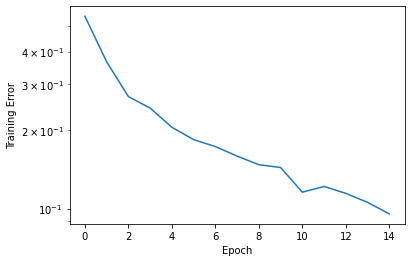

In [16]:
#Loss function
import pandas as pd
import matplotlib.pyplot as plt
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Training Error")
plt.savefig('books_read.png')

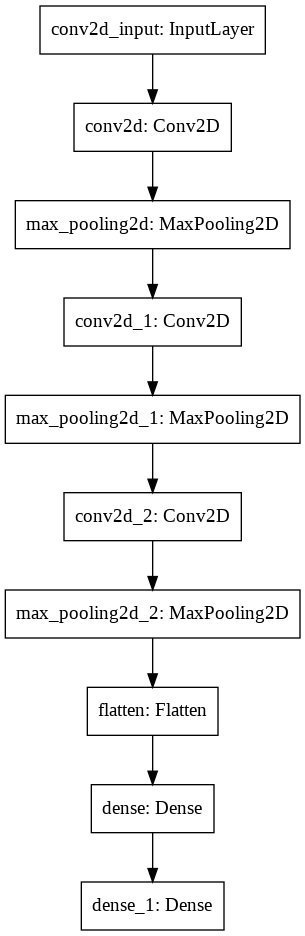

In [17]:
#Our CNN model
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
    model, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [18]:
model.save('hindi_cnn_model_1.h5')

### Unzip the test dataset and load it. Use the fitted model to predict for an image in the test dataset.

In [ ]:
!unzip test.zip
test_img = image.load_img('test/90.jpg', target_size=(64,64))

In [20]:
test_img = image.img_to_array(test_img)

In [21]:
test_img = np.expand_dims(test_img, axis=0)

In [22]:
verdict = model.predict(test_img)

In [23]:
verdict[0][0]

1.0

### Save all the predicted data results in a result.json file.

In [24]:
import random
import json
# from utils.io import write_json

def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)

def read_json(filename):
    with open(filename, 'r') as outfile:
        data =  json.load(outfile)
    return data

def generate_sample_file(filename):
    res = {}
    for i in range(1,99):
        
        test_set = str(i) + '.jpg'
        test_path = 'test/' + test_set
        test_img = image.load_img(test_path, target_size=(64,64))
        test_img = image.img_to_array(test_img)
        test_img = np.expand_dims(test_img, axis=0)
        res[test_set] = int(model.predict(test_img)[0][0])

    write_json(filename, res)

if __name__ == '__main__':
    generate_sample_file('./result.json')